# Students performance in exams

## Importing libraries and reading data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/students_perform/StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.duplicated().sum()

0

## Feature Engineering

In [11]:
df['perc'] = round((df['reading score'] + df['writing score'] + df['math score']) / 3,2)

In [14]:
def Grade(perc):
    if perc > 85 : return "A"
    if perc > 71 : return "B"
    if perc > 61 : return "C"
    if perc >= 50 : return "D"
    else: return "F"

df["Grade"] = df['perc'].apply(lambda x: Grade(x))

In [17]:
passmark = 50

In [19]:
df['math_passstatus'] = np.where(df['math score'] < passmark , 'F','P')

In [22]:
df['reading_passstatus'] = np.where(df['reading score'] < passmark , 'F','P') 

In [23]:
df['writing_passstatus'] = np.where(df['writing score'] < passmark , 'F','P')

In [42]:
df['perc_passstatus'] = np.where(df['perc'] < passmark , 'F','P')

In [43]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,perc,Grade,math_passstatus,reading_passstatus,writing_passstatus,perc_passstatus
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,B,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,82.33,B,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,92.67,A,P,P,P,P


## Exploratory Data Analysis

<AxesSubplot:ylabel='gender'>

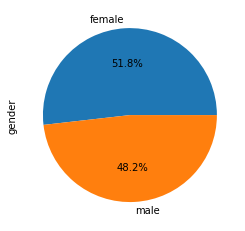

In [27]:
df.gender.value_counts().plot(kind='pie',autopct='%1.1f%%')

Female more than Male

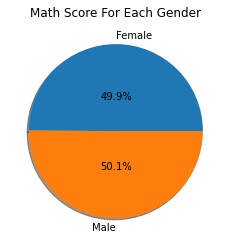

In [35]:
x = df.groupby('gender')['math score'].sum()
plt.pie(x,autopct='%1.1f%%',labels=['Female','Male'],shadow=True,pctdistance=.4)
plt.title('Math Score For Each Gender')
plt.show()

Female more than Male but math score of male better than female

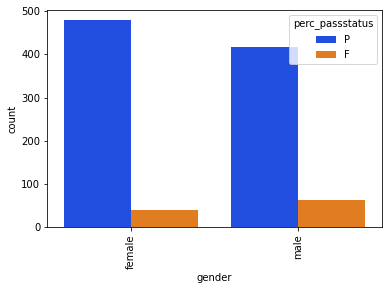

In [45]:
p = sns.countplot(x='gender', data = df, hue='perc_passstatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

but in total percentage female pass the percantage more and fail less than the male

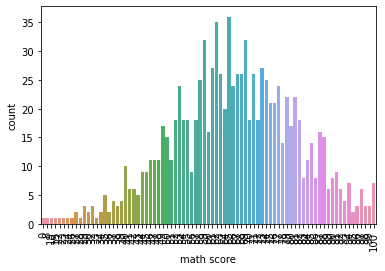

In [37]:
p = sns.countplot(x="math score", data = df)
_ = plt.setp(p.get_xticklabels(), rotation=90,) 

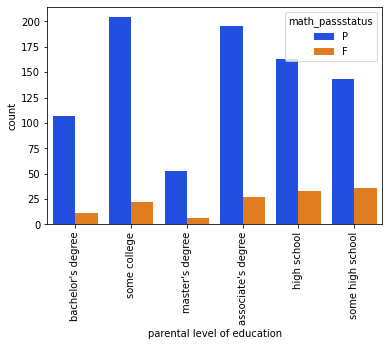

In [39]:
p = sns.countplot(x='parental level of education', data = df, hue='math_passstatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

<AxesSubplot:ylabel='lunch'>

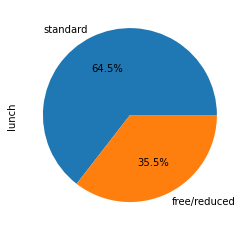

In [48]:
df.lunch.value_counts().plot(kind = 'pie',autopct='%1.1f%%')

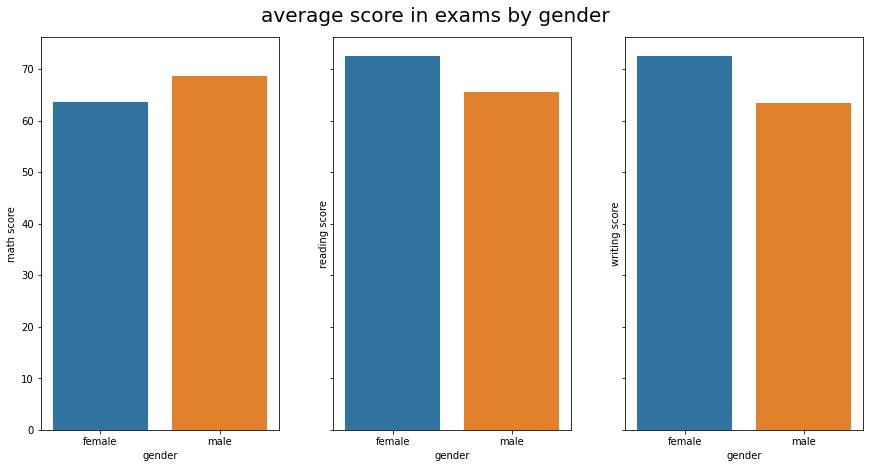

In [52]:
df.pivot_table(values=['math score', 'reading score', 'writing score'], index='gender').reset_index()
fig, axes=plt.subplots(1, 3,sharey=True, figsize=(13,7))
sns.barplot(ax=axes[0], x='gender', y='math score', data=df,  ci=None)
sns.barplot(ax=axes[1], x='gender', y='reading score', data=df, ci=None)
sns.barplot(ax=axes[2], x='gender', y='writing score', data=df, ci=None)
plt.tight_layout(pad=4.0)
fig.suptitle('average score in exams by gender', fontsize=20)
plt.show()

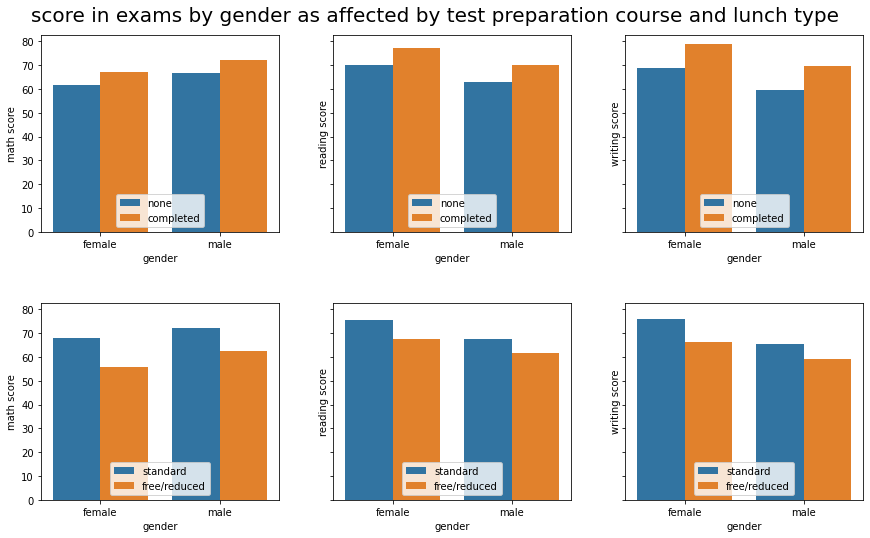

In [54]:
fig, axes=plt.subplots(2, 3,sharey=True, figsize=(13,8))
sns.barplot(ax=axes[0,0], x='gender', y='math score', data=df, hue='test preparation course', ci=None)
sns.barplot(ax=axes[0,1], x='gender', y='reading score', data=df,hue='test preparation course', ci=None)
sns.barplot(ax=axes[0,2], x='gender', y='writing score', data=df,hue='test preparation course', ci=None)

sns.barplot(ax=axes[1,0], x='gender', y='math score', data=df, hue='lunch', ci=None)
sns.barplot(ax=axes[1,1], x='gender', y='reading score', data=df,hue='lunch', ci=None)
sns.barplot(ax=axes[1,2], x='gender', y='writing score', data=df,hue='lunch', ci=None)



plt.tight_layout(pad=4.0)
fig.suptitle('score in exams by gender as affected by test preparation course and lunch type',fontsize=20)
axes[0,0].legend(loc='lower center')
axes[0,1].legend(loc='lower center')
axes[0,2].legend(loc='lower center')
axes[1,0].legend(loc='lower center')
axes[1,1].legend(loc='lower center')
axes[1,2].legend(loc='lower center')
plt.show()

<AxesSubplot:>

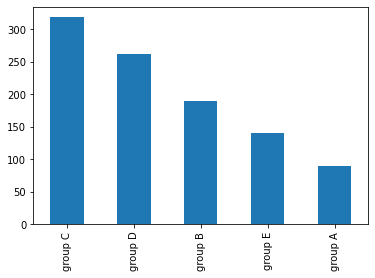

In [58]:
df['race/ethnicity'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

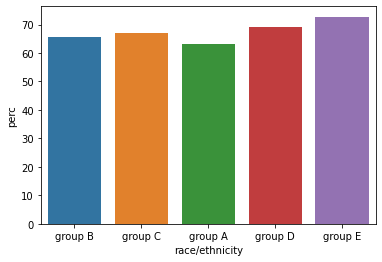

In [63]:
x = df.pivot_table(values='perc', index='race/ethnicity').reset_index()
sns.barplot(x= 'race/ethnicity',y= 'perc',data = df,ci = None)
plt.show()

In [64]:
df['reading score'].sum()

69169

In [72]:
df.pivot_table(values=['math score', 'reading score', 'writing score'], index='gender').reset_index()


,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203
